In [1]:
# Import Splinter, BeautifulSoup, and Pandas
from splinter import Browser
from bs4 import BeautifulSoup as soup
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
# Set the executable path and initialize Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)



====== WebDriver manager ======
Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
Get LATEST driver version for 92.0.4515
Trying to download new driver from https://chromedriver.storage.googleapis.com/92.0.4515.107/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\NAECC\.wdm\drivers\chromedriver\win32\92.0.4515.107]


In [49]:
# Visit the mars nasa news site
url = 'https://weather.com/weather/tenday/l/c497a8fe783a21075e4be0fe8e3851415b88cb2e30a6fa184550e22a7ae728c6'
browser.visit(url)

# Optional delay for loading the page
browser.is_element_present_by_css('div.list_text', wait_time=1)

False

<html dir="ltr" lang="en-US"><head>
<meta charset="utf-8" data-react-helmet="true"/><meta content="width=device-width, initial-scale=1, viewport-fit=cover" data-react-helmet="true" name="viewport"/><meta content="max-image-preview:large" data-react-helmet="true" name="robots"/><meta content="index, follow" data-react-helmet="true" name="robots"/><meta content="origin" data-react-helmet="true" name="referrer"/><meta content="Be prepared with the most accurate 10-day forecast for Nashville, TN with highs, lows, chance of precipitation from The Weather Channel and Weather.com" data-react-helmet="true" name="description"/><meta content="#ffffff" data-react-helmet="true" name="msapplication-TileColor"/><meta content="/daily/assets/ms-icon-144x144.d353af.png" data-react-helmet="true" name="msapplication-TileImage"/><meta content="#ffffff" data-react-helmet="true" name="theme-color"/><meta content="Nashville, TN 10-Day Weather Forecast - The Weather Channel | Weather.com" data-react-helmet="t
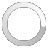
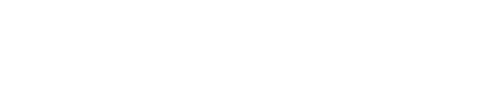
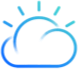

In [50]:
# Convert the browser html to a soup object and then quit the browser
html = browser.html
weather_soup = soup(html, 'html.parser')

#slide_elem = news_soup.select_one('div.list_text')

print(weather_soup)

In [47]:
weather_soup.find('span', class_='DetailsSummary--highTempValue--3Oteu')

<span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">94°</span>

In [134]:
weather_soup.find('span', class_='DetailsSummary--highTempValue--3Oteu').get_text()

'94°'

In [137]:
# Use the parent element to find all high temperatures and save as `HighTemps`
HighTemps = weather_soup.find_all('span', class_='DetailsSummary--highTempValue--3Oteu')
HighTemps

[<span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">94°</span>,
 <span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">98°</span>,
 <span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">97°</span>,
 <span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">95°</span>,
 <span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">92°</span>,
 <span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">90°</span>,
 <span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">88°</span>,
 <span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">85°</span>,
 <span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">87°</span>,
 <span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">89°</span>,
 <span class="DetailsSummary--highTempValue--3Oteu

In [138]:
#For Loop to grab all high temperatures
High_Temps = []
for temp in HighTemps:
    degrees = temp.get_text()
    High_Temps.append(degrees)
    
High_Temps

['94°',
 '98°',
 '97°',
 '95°',
 '92°',
 '90°',
 '88°',
 '85°',
 '87°',
 '89°',
 '89°',
 '89°',
 '89°',
 '90°',
 '90°']

In [139]:
# Use the parent element to find all low temperatures and save as `LowTemps`
LowTemps = weather_soup.find_all('span', class_='DetailsSummary--lowTempValue--3H-7I')
LowTemps

[<span class="DetailsSummary--lowTempValue--3H-7I" data-testid="TemperatureValue">77°</span>,
 <span class="DetailsSummary--lowTempValue--3H-7I" data-testid="TemperatureValue">77°</span>,
 <span class="DetailsSummary--lowTempValue--3H-7I" data-testid="TemperatureValue">76°</span>,
 <span class="DetailsSummary--lowTempValue--3H-7I" data-testid="TemperatureValue">74°</span>,
 <span class="DetailsSummary--lowTempValue--3H-7I" data-testid="TemperatureValue">70°</span>,
 <span class="DetailsSummary--lowTempValue--3H-7I" data-testid="TemperatureValue">70°</span>,
 <span class="DetailsSummary--lowTempValue--3H-7I" data-testid="TemperatureValue">70°</span>,
 <span class="DetailsSummary--lowTempValue--3H-7I" data-testid="TemperatureValue">70°</span>,
 <span class="DetailsSummary--lowTempValue--3H-7I" data-testid="TemperatureValue">71°</span>,
 <span class="DetailsSummary--lowTempValue--3H-7I" data-testid="TemperatureValue">70°</span>,
 <span class="DetailsSummary--lowTempValue--3H-7I" data-test

In [140]:
#For Loop to grab all low temperatures
Low_Temps = []
for temp in LowTemps:
    degrees = temp.get_text()
    Low_Temps.append(degrees)
    
Low_Temps

['77°',
 '77°',
 '76°',
 '74°',
 '70°',
 '70°',
 '70°',
 '70°',
 '71°',
 '70°',
 '69°',
 '70°',
 '70°',
 '70°',
 '70°']

In [81]:
# Use the parent element to find all conditions and save as `Conditions`
Conditions = weather_soup.find_all('span', class_='DetailsSummary--extendedData--365A_')
Conditions

[<span class="DetailsSummary--extendedData--365A_">Partly Cloudy</span>,
 <span class="DetailsSummary--extendedData--365A_">Mostly Sunny</span>,
 <span class="DetailsSummary--extendedData--365A_">Partly Cloudy</span>,
 <span class="DetailsSummary--extendedData--365A_">Partly Cloudy</span>,
 <span class="DetailsSummary--extendedData--365A_">PM Thunderstorms</span>,
 <span class="DetailsSummary--extendedData--365A_">Isolated Thunderstorms</span>,
 <span class="DetailsSummary--extendedData--365A_">Scattered Thunderstorms</span>,
 <span class="DetailsSummary--extendedData--365A_">Scattered Thunderstorms</span>,
 <span class="DetailsSummary--extendedData--365A_">Scattered Thunderstorms</span>,
 <span class="DetailsSummary--extendedData--365A_">Isolated Thunderstorms</span>,
 <span class="DetailsSummary--extendedData--365A_">Scattered Thunderstorms</span>,
 <span class="DetailsSummary--extendedData--365A_">AM Thunderstorms</span>,
 <span class="DetailsSummary--extendedData--365A_">Scattered 

In [141]:
#For Loop to grab all conditions
Conditions_List = []
for condition in Conditions:
    description = condition.get_text()
    Conditions_List.append(description)
    
Conditions_List

['Partly Cloudy',
 'Mostly Sunny',
 'Partly Cloudy',
 'Partly Cloudy',
 'PM Thunderstorms',
 'Isolated Thunderstorms',
 'Scattered Thunderstorms',
 'Scattered Thunderstorms',
 'Scattered Thunderstorms',
 'Isolated Thunderstorms',
 'Scattered Thunderstorms',
 'AM Thunderstorms',
 'Scattered Thunderstorms',
 'AM Thunderstorms',
 'AM Thunderstorms']

In [142]:
# Use the parent element to find all wind speeds and save as `Winds`
Winds = weather_soup.find_all('span', class_='Wind--windWrapper--3aqXJ undefined')
Winds

[<span class="Wind--windWrapper--3aqXJ undefined" data-testid="Wind">SW <!-- -->11 mph</span>,
 <span class="Wind--windWrapper--3aqXJ undefined" data-testid="Wind">SW <!-- -->10 mph</span>,
 <span class="Wind--windWrapper--3aqXJ undefined" data-testid="Wind">SW <!-- -->9 mph</span>,
 <span class="Wind--windWrapper--3aqXJ undefined" data-testid="Wind">WSW <!-- -->7 mph</span>,
 <span class="Wind--windWrapper--3aqXJ undefined" data-testid="Wind">N <!-- -->8 mph</span>,
 <span class="Wind--windWrapper--3aqXJ undefined" data-testid="Wind">NE <!-- -->8 mph</span>,
 <span class="Wind--windWrapper--3aqXJ undefined" data-testid="Wind">ENE <!-- -->7 mph</span>,
 <span class="Wind--windWrapper--3aqXJ undefined" data-testid="Wind">E <!-- -->8 mph</span>,
 <span class="Wind--windWrapper--3aqXJ undefined" data-testid="Wind">S <!-- -->7 mph</span>,
 <span class="Wind--windWrapper--3aqXJ undefined" data-testid="Wind">ESE <!-- -->7 mph</span>,
 <span class="Wind--windWrapper--3aqXJ undefined" data-tes

In [144]:
#For Loop to grab all winds
Winds_List = []
for wind in Winds:
    description = wind.get_text()
    Winds_List.append(description)
    
Winds_List

['SW 11 mph',
 'SW 10 mph',
 'SW 9 mph',
 'WSW 7 mph',
 'N 8 mph',
 'NE 8 mph',
 'ENE 7 mph',
 'E 8 mph',
 'S 7 mph',
 'ESE 7 mph',
 'ESE 6 mph',
 'SE 7 mph',
 'E 6 mph',
 'ENE 6 mph',
 'NE 7 mph']

In [230]:
#Cleaning up winds to only have speed
#Should use for loop but easy enough with only fifteen speeds
wind_info = []
wind_speeds = []
for w in Winds_List:
    info = w.split()
    wind_info.append(info)
    
wind_speeds.append(wind_info[0][1])
wind_speeds.append(wind_info[1][1])
wind_speeds.append(wind_info[2][1])
wind_speeds.append(wind_info[3][1])
wind_speeds.append(wind_info[4][1])
wind_speeds.append(wind_info[5][1])
wind_speeds.append(wind_info[6][1])
wind_speeds.append(wind_info[7][1])
wind_speeds.append(wind_info[8][1])
wind_speeds.append(wind_info[9][1])
wind_speeds.append(wind_info[10][1])
wind_speeds.append(wind_info[11][1])
wind_speeds.append(wind_info[12][1])
wind_speeds.append(wind_info[13][1])
wind_speeds.append(wind_info[14][1])
wind_speeds

['11', '10', '9', '7', '8', '8', '7', '8', '7', '7', '6', '7', '6', '6', '7']

In [83]:
# Use the parent element to find all chances of rain and save as `PrecipChances`
PrecipChances = weather_soup.find_all('span', class_='DailyContent--value--37sk2')
PrecipChances

[<span class="DailyContent--value--37sk2" data-testid="PercentageValue">15%</span>,
 <span class="Wind--windWrapper--3aqXJ DailyContent--value--37sk2" data-testid="Wind">SW <!-- -->11 mph</span>,
 <span class="DailyContent--value--37sk2" data-testid="PercentageValue">16%</span>,
 <span class="Wind--windWrapper--3aqXJ DailyContent--value--37sk2" data-testid="Wind">SSW <!-- -->8 mph</span>,
 <span class="DailyContent--value--37sk2" data-testid="PercentageValue">18%</span>,
 <span class="Wind--windWrapper--3aqXJ DailyContent--value--37sk2" data-testid="Wind">SW <!-- -->10 mph</span>,
 <span class="DailyContent--value--37sk2" data-testid="PercentageValue">9%</span>,
 <span class="Wind--windWrapper--3aqXJ DailyContent--value--37sk2" data-testid="Wind">SSW <!-- -->8 mph</span>,
 <span class="DailyContent--value--37sk2" data-testid="PercentageValue">24%</span>,
 <span class="Wind--windWrapper--3aqXJ DailyContent--value--37sk2" data-testid="Wind">SW <!-- -->9 mph</span>,
 <span class="DailyCon

In [171]:
#For Loop to grab all precips
Precips_List = []
for precip in PrecipChances:
    chance = precip.get_text()
    Precips_List.append(chance)

Precips_List_Final = [(Precips_List[0]), (Precips_List[4]), (Precips_List[8]), (Precips_List[12]), (Precips_List[16]),
                     (Precips_List[20]), (Precips_List[24]), (Precips_List[28]), (Precips_List[32]), (Precips_List[36]),
                     (Precips_List[40]), (Precips_List[44]), (Precips_List[48]), (Precips_List[52]), (Precips_List[56])]
    
Precips_List_Final

['15%',
 '18%',
 '24%',
 '24%',
 '44%',
 '35%',
 '45%',
 '41%',
 '41%',
 '31%',
 '46%',
 '36%',
 '36%',
 '40%',
 '37%']

In [153]:
# Use the parent element to find all humidity readings and save as `Humidities`
Humidities = weather_soup.find_all('span', class_='DetailsTable--value--1q_qD')
Humidities

[<span class="DetailsTable--value--1q_qD" data-testid="PercentageValue">52%</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="UVIndexValue">8 of 10</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="SunriseTime">6:01 am</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="SunsetTime">7:42 pm</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="PercentageValue">74%</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="UVIndexValue">0 of 10</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="MoonriseTime">7:58 am</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="MoonsetTime">9:22 pm</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="PercentageValue">54%</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="UVIndexValue">10 of 10</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="SunriseTime">6:02 am</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="SunsetTime">7:41 

In [172]:
#For Loop to grab all humidities
Hums_List = []
for hum in Humidities:
    percent = hum.get_text()
    Hums_List.append(percent)

Hums_List_Final = [(Hums_List[0]), (Hums_List[8]), (Hums_List[16]), (Hums_List[24]), (Hums_List[32]),
                     (Hums_List[40]), (Hums_List[48]), (Hums_List[56]), (Hums_List[64]), (Hums_List[72]),
                     (Hums_List[80]), (Hums_List[88]), (Hums_List[96]), (Hums_List[104]), (Hums_List[112])]
    
Hums_List_Final

['52%',
 '54%',
 '57%',
 '59%',
 '67%',
 '64%',
 '68%',
 '71%',
 '70%',
 '68%',
 '66%',
 '63%',
 '63%',
 '62%',
 '62%']

In [237]:
#Creating Forecast Dataframe
forecast_df = pd.DataFrame()

forecast_df['HighTemps'] = High_Temps
forecast_df['LowTemps'] = Low_Temps
forecast_df['Condtions'] = Conditions_List
forecast_df['Winds'] = wind_speeds
forecast_df['Precipitation'] = Precips_List_Final
forecast_df['Humidity'] = Hums_List_Final

forecast_df

,HighTemps,LowTemps,Condtions,Winds,Precipitation,Humidity
0,94°,77°,Partly Cloudy,11,15%,52%
1,98°,77°,Mostly Sunny,10,18%,54%
2,97°,76°,Partly Cloudy,9,24%,57%
3,95°,74°,Partly Cloudy,7,24%,59%
4,92°,70°,PM Thunderstorms,8,44%,67%
5,90°,70°,Isolated Thunderstorms,8,35%,64%
6,88°,70°,Scattered Thunderstorms,7,45%,68%
7,85°,70°,Scattered Thunderstorms,8,41%,71%
8,87°,71°,Scattered Thunderstorms,7,41%,70%
9,89°,70°,Isolated Thunderstorms,7,31%,68%


In [238]:
#Removing symbols
forecast_df['HighTemps'] = forecast_df['HighTemps'].str.rstrip("°")
forecast_df['LowTemps'] = forecast_df['LowTemps'].str.rstrip("°")
forecast_df['Precipitation'] = forecast_df['Precipitation'].str.rstrip("%")
forecast_df['Humidity'] = forecast_df['Humidity'].str.rstrip("%")

forecast_df

,HighTemps,LowTemps,Condtions,Winds,Precipitation,Humidity
0,94,77,Partly Cloudy,11,15,52
1,98,77,Mostly Sunny,10,18,54
2,97,76,Partly Cloudy,9,24,57
3,95,74,Partly Cloudy,7,24,59
4,92,70,PM Thunderstorms,8,44,67
5,90,70,Isolated Thunderstorms,8,35,64
6,88,70,Scattered Thunderstorms,7,45,68
7,85,70,Scattered Thunderstorms,8,41,71
8,87,71,Scattered Thunderstorms,7,41,70
9,89,70,Isolated Thunderstorms,7,31,68


In [239]:
#Converting to out of strings
forecast_df['HighTemps'] = forecast_df['HighTemps'].astype(float)
forecast_df['LowTemps'] = forecast_df['LowTemps'].astype(float)
forecast_df['Winds'] = forecast_df['Winds'].astype(float)
forecast_df['Precipitation'] = forecast_df['Precipitation'].astype(float)
forecast_df['Humidity'] = forecast_df['Humidity'].astype(float)

#Converting Precipitation to decimal
forecast_df['Precipitation'] = (forecast_df['Precipitation'] / 100)

forecast_df

,HighTemps,LowTemps,Condtions,Winds,Precipitation,Humidity
0,94.0,77.0,Partly Cloudy,11.0,0.15,52.0
1,98.0,77.0,Mostly Sunny,10.0,0.18,54.0
2,97.0,76.0,Partly Cloudy,9.0,0.24,57.0
3,95.0,74.0,Partly Cloudy,7.0,0.24,59.0
4,92.0,70.0,PM Thunderstorms,8.0,0.44,67.0
5,90.0,70.0,Isolated Thunderstorms,8.0,0.35,64.0
6,88.0,70.0,Scattered Thunderstorms,7.0,0.45,68.0
7,85.0,70.0,Scattered Thunderstorms,8.0,0.41,71.0
8,87.0,71.0,Scattered Thunderstorms,7.0,0.41,70.0
9,89.0,70.0,Isolated Thunderstorms,7.0,0.31,68.0
